In [20]:
#load the cleaned_wine_testing_date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#load the cleaned_wine_testing_data
wine_testing_data = pd.read_csv('cleaned_wine_testing_data.csv')
#load the word2vec model trained
from gensim.models import Word2Vec
w2v = Word2Vec.load('/Users/samdisorbo/Documents/code/python_projects/eecs448/wine/wine_word2vec_model')




In [21]:
#make a data frame called train that has the word2vec word vectors as one column called review, then the location and the year as well as separate columns
# for the location and the year
train = pd.DataFrame()
train['description'] = wine_testing_data['description']
train['country'] = wine_testing_data['country']
#make a column for the price
train['price'] = wine_testing_data['price']

#for every row in description in train, get the word2vec vector for each word in the description
#for every row in description in train, get the word2vec vector for each word in the description and make a nested list of the word vectors for each word in the description
input_data_embeddings = []
for review in train['description']:
    embedding_seq = [w2v.wv[word] for word in review if word in w2v.wv]
    #get the average of the word vectors in the description
    embedding_seq = np.mean(embedding_seq, axis=0)
    input_data_embeddings.append(embedding_seq)
    max_length = max([len(embedding_seq) for embedding_seq in input_data_embeddings])




train['description'] = input_data_embeddings


In [22]:
#make the country column into a one hot encoding
train = pd.get_dummies(train, columns=['country'])


In [23]:
train.head()

,description,price,country_Argentina,country_Australia,country_Austria,country_Brazil,country_Bulgaria,country_Canada,country_Chile,country_Croatia,...,country_Peru,country_Portugal,country_Romania,country_Slovenia,country_South Africa,country_Spain,country_Turkey,country_US,country_Ukraine,country_Uruguay
0,"[-0.10903682, 0.16674586, -0.023939501, 0.0186...",10.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,"[-0.12946124, 0.19728336, -0.0224785, 0.038923...",NaN,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,"[-0.12286806, 0.18504223, -0.021750212, 0.0396...",NaN,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,"[-0.113474615, 0.17094171, -0.016420634, 0.036...",17.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,"[-0.12403471, 0.17243175, -0.02541887, 0.01217...",40.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [24]:
#for every number in the description vector, make a separate column for it
train2=train
for i in range(max_length):
    train2['description_{}'.format(i)] = train2['description'].apply(lambda x: x[i] if i < len(x) else np.nan)


/var/folders/_8/5fm0bg890md4d79y3w9f4vvm0000gn/T/ipykernel_67989/3311544949.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train2['description_{}'.format(i)] = train2['description'].apply(lambda x: x[i] if i < len(x) else np.nan)
/var/folders/_8/5fm0bg890md4d79y3w9f4vvm0000gn/T/ipykernel_67989/3311544949.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train2['description_{}'.format(i)] = train2['description'].apply(lambda x: x[i] if i < len(x) else np.nan)
/var/folders/_8/5fm0bg890md4d79y3w9f4vvm0000gn/T/ipykernel_67989

In [25]:
#drop description column
train2 = train2.drop(columns='description')
train2.head()


,price,country_Argentina,country_Australia,country_Austria,country_Brazil,country_Bulgaria,country_Canada,country_Chile,country_Croatia,country_Cyprus,...,description_90,description_91,description_92,description_93,description_94,description_95,description_96,description_97,description_98,description_99
0,10.0,False,False,False,False,False,False,False,False,False,...,0.050029,0.112057,0.042343,0.020344,0.234615,0.083174,0.045130,-0.206450,-0.072952,-0.082605
1,NaN,False,False,False,False,False,False,False,False,False,...,0.041649,0.109268,0.042872,0.019731,0.251971,0.030057,0.047655,-0.216614,-0.114132,-0.090859
2,NaN,False,False,False,False,False,False,False,False,False,...,0.047475,0.114470,0.036660,0.032133,0.235013,0.055787,0.048548,-0.196372,-0.092184,-0.086586
3,17.0,False,False,False,False,False,False,False,False,False,...,0.048766,0.109573,0.036771,0.029117,0.233494,0.079162,0.038659,-0.202646,-0.079642,-0.075094
4,40.0,False,False,False,False,False,False,False,False,False,...,0.046486,0.104262,0.049844,0.005397,0.236942,0.061382,0.042343,-0.212599,-0.080697,-0.078462


In [26]:
#turn the description column into a single number which is an average of the vector
train['description'] = train['description'].apply(lambda x: np.mean(x, axis=0))
train.head()

,description,price,country_Argentina,country_Australia,country_Austria,country_Brazil,country_Bulgaria,country_Canada,country_Chile,country_Croatia,...,description_90,description_91,description_92,description_93,description_94,description_95,description_96,description_97,description_98,description_99
0,-0.015296,10.0,False,False,False,False,False,False,False,False,...,0.050029,0.112057,0.042343,0.020344,0.234615,0.083174,0.045130,-0.206450,-0.072952,-0.082605
1,-0.012330,NaN,False,False,False,False,False,False,False,False,...,0.041649,0.109268,0.042872,0.019731,0.251971,0.030057,0.047655,-0.216614,-0.114132,-0.090859
2,-0.012402,NaN,False,False,False,False,False,False,False,False,...,0.047475,0.114470,0.036660,0.032133,0.235013,0.055787,0.048548,-0.196372,-0.092184,-0.086586
3,-0.013389,17.0,False,False,False,False,False,False,False,False,...,0.048766,0.109573,0.036771,0.029117,0.233494,0.079162,0.038659,-0.202646,-0.079642,-0.075094
4,-0.014122,40.0,False,False,False,False,False,False,False,False,...,0.046486,0.104262,0.049844,0.005397,0.236942,0.061382,0.042343,-0.212599,-0.080697,-0.078462


In [27]:
#drop rows that have na
train = train.dropna()
train2 = train2.dropna()

#drop rows of price over 36
train = train[train['price'] < 36]
#drop rows 3 std deviations away from the mean price
train2 = train2[np.abs(train2['price']-train2['price'].mean()) <= (3*train2['price'].std())]
train.head()

,description,price,country_Argentina,country_Australia,country_Austria,country_Brazil,country_Bulgaria,country_Canada,country_Chile,country_Croatia,...,description_90,description_91,description_92,description_93,description_94,description_95,description_96,description_97,description_98,description_99
0,-0.015296,10.0,False,False,False,False,False,False,False,False,...,0.050029,0.112057,0.042343,0.020344,0.234615,0.083174,0.045130,-0.206450,-0.072952,-0.082605
3,-0.013389,17.0,False,False,False,False,False,False,False,False,...,0.048766,0.109573,0.036771,0.029117,0.233494,0.079162,0.038659,-0.202646,-0.079642,-0.075094
5,-0.010417,15.0,False,False,False,False,False,False,False,False,...,0.052867,0.100091,0.031612,0.025244,0.236688,0.044487,0.065255,-0.203128,-0.100817,-0.081771
6,-0.013106,30.0,False,False,False,False,False,False,False,False,...,0.045512,0.101146,0.030935,0.030879,0.241507,0.059955,0.054016,-0.206346,-0.089498,-0.081905
7,-0.015654,13.0,False,False,False,False,False,False,False,False,...,0.043407,0.118382,0.036140,0.021968,0.222480,0.072845,0.036690,-0.192118,-0.091186,-0.085181


In [34]:
#initiate an xgboost model
import xgboost as xgb

#split the data into training and testing data
from sklearn.model_selection import train_test_split
y = train2['price']
X = train2.drop(['price'], axis=1)




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train the model to predict the price of the wine
model = xgb.XGBRegressor()


In [35]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [36]:
#make predictions
predictions = model.predict(X_test)


In [40]:
train2.head()

,price,country_Argentina,country_Australia,country_Austria,country_Brazil,country_Bulgaria,country_Canada,country_Chile,country_Croatia,country_Cyprus,...,description_90,description_91,description_92,description_93,description_94,description_95,description_96,description_97,description_98,description_99
0,10.0,False,False,False,False,False,False,False,False,False,...,0.050029,0.112057,0.042343,0.020344,0.234615,0.083174,0.045130,-0.206450,-0.072952,-0.082605
3,17.0,False,False,False,False,False,False,False,False,False,...,0.048766,0.109573,0.036771,0.029117,0.233494,0.079162,0.038659,-0.202646,-0.079642,-0.075094
4,40.0,False,False,False,False,False,False,False,False,False,...,0.046486,0.104262,0.049844,0.005397,0.236942,0.061382,0.042343,-0.212599,-0.080697,-0.078462
5,15.0,False,False,False,False,False,False,False,False,False,...,0.052867,0.100091,0.031612,0.025244,0.236688,0.044487,0.065255,-0.203128,-0.100817,-0.081771
6,30.0,False,False,False,False,False,False,False,False,False,...,0.045512,0.101146,0.030935,0.030879,0.241507,0.059955,0.054016,-0.206346,-0.089498,-0.081905


In [41]:
#print out a list of every column name in train2
for col in train2.columns:
    print(col)
    

price
country_Argentina
country_Australia
country_Austria
country_Brazil
country_Bulgaria
country_Canada
country_Chile
country_Croatia
country_Cyprus
country_Czech Republic
country_Egypt
country_England
country_France
country_Georgia
country_Germany
country_Greece
country_Hungary
country_Israel
country_Italy
country_Lebanon
country_Luxembourg
country_Mexico
country_Moldova
country_Morocco
country_New Zealand
country_Peru
country_Portugal
country_Romania
country_Slovenia
country_South Africa
country_Spain
country_Turkey
country_US
country_Ukraine
country_Uruguay
description_0
description_1
description_2
description_3
description_4
description_5
description_6
description_7
description_8
description_9
description_10
description_11
description_12
description_13
description_14
description_15
description_16
description_17
description_18
description_19
description_20
description_21
description_22
description_23
description_24
description_25
description_26
description_27
description_28
descrip

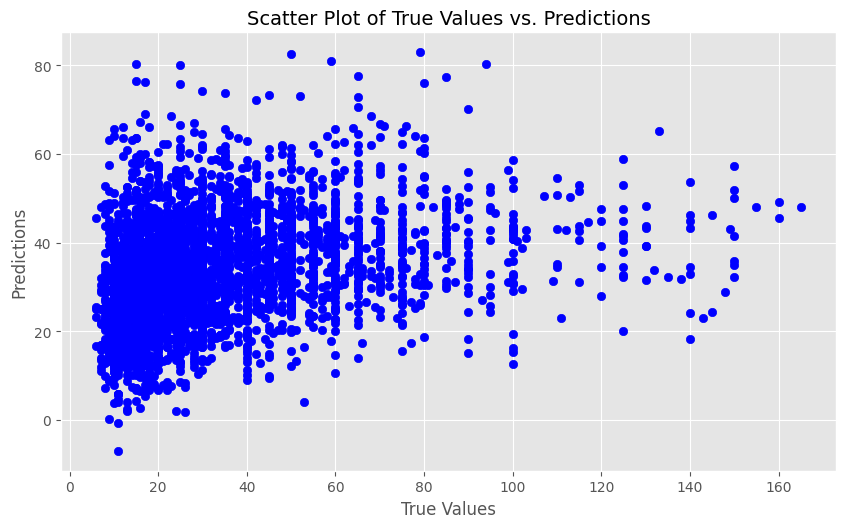

In [37]:
import matplotlib.pyplot as plt

# Using a predefined style for aesthetics
plt.style.use('ggplot')

#plot the predictions
plt.figure(figsize=(10, 6))  # Increase figure size for better visibility
plt.scatter(y_test, predictions, color='blue', marker='o')  # Change marker style and color
plt.xlabel('True Values', fontsize=12)  # Increase font size
plt.ylabel('Predictions', fontsize=12)
plt.title('Scatter Plot of True Values vs. Predictions', fontsize=14)  # Add a title
plt.grid(True)  # Add gridlines

# Adding a line of perfect predictions
#plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Ensuring the aspect ratio is equal so that the scale of x and y axes are the same
plt.gca().set_aspect('equal', adjustable='box')

plt.show()




In [38]:
#get the mean squared error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, predictions))

#get the percent of predictions that are within the square root of the mean squared error
np.mean(np.abs((y_test - predictions) < np.sqrt(mean_squared_error(y_test, predictions))))




515.2614326754891


0.88510101010101

In [39]:
#save the model as a json
model.save_model('xgboost_wine.json')